<h1>Ozempic Side Effects NLP<h1/>

<h2>Libraries<h2/>

In [79]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation


<h2>hello<h2/>

In [39]:
# PRAW Setup
reddit = praw.Reddit(
    client_id='FsHBk7J5OcNXIh2OmzXWOg',
    client_secret='oFwrVTKJgbRcjslvDCp0iM6d9RO7Xw',
    user_agent='MB WebScrapping by u/ActualConfusion3366'
)

count = 0
comments = []
for post in reddit.subreddit('all').search("ozempic", sort="new", limit=None):
    post.comments.replace_more(limit=0)
    """print(f"Title: {post.title}")
    print(f"Score: {post.score}")
    print(f"URL: {post.url}")
    print("-" * 50)"""
    count += 1
    for comment in post.comments[:5]:
        comments.append(comment.body)


df = pd.DataFrame(comments, columns=["comment"])   
print(df.head())
print(count)


                                             comment
0  If you’ve been off of any GLP-1 type peptide f...
1  Is he the jerk it sounds like he is?  He must ...
2  Honestly that’s heartbreaking her mom does tha...
3  No. As dogs do not prepare their own food, it'...
4  No.\n\nDo you need help building a diet plan f...
246


<h2>hello<h2/>

In [54]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 1: Text Preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df = df[~df['comment'].isin(["[deleted]", "[removed]"])]
df['cleaned_post'] = df['comment'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mab23\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment,cleaned_post
0,If you’ve been off of any GLP-1 type peptide f...,you’ve glp1 type peptide 3 months act like you...
1,Is he the jerk it sounds like he is? He must ...,jerk sounds like must feel like loser failure ...
2,Honestly that’s heartbreaking her mom does tha...,honestly that’s heartbreaking mom
3,"No. As dogs do not prepare their own food, it'...",dogs prepare food easy put weight loss diet se...
4,No.\n\nDo you need help building a diet plan f...,need help building diet plan dog hypothetical
...,...,...
668,I need this shirt I hope they release it again!,need shirt hope release
669,Any notable departures in their patent departm...,notable departures patent department last year...
671,"Fortune falsely cites ""a recent report in *Sci...",fortune falsely cites recent report science ac...
672,![gif](giphy|GDnomdqpSHlIs),gifgiphygdnomdqpshlis


<h2>hello<h2/>

In [58]:
# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_post'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15511 stored elements and shape (668, 4896)>

<h2>hello<h2/>

In [76]:
# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df

,comment,cleaned_post,cluster,sentiment,predicted_sentiment
0,If you’ve been off of any GLP-1 type peptide f...,you’ve glp1 type peptide 3 months act like you...,1,1,1
1,Is he the jerk it sounds like he is? He must ...,jerk sounds like must feel like loser failure ...,0,0,0
2,Honestly that’s heartbreaking her mom does tha...,honestly that’s heartbreaking mom,0,0,0
3,"No. As dogs do not prepare their own food, it'...",dogs prepare food easy put weight loss diet se...,1,1,1
4,No.\n\nDo you need help building a diet plan f...,need help building diet plan dog hypothetical,1,1,1
...,...,...,...,...,...
668,I need this shirt I hope they release it again!,need shirt hope release,0,1,1
669,Any notable departures in their patent departm...,notable departures patent department last year...,1,1,1
671,"Fortune falsely cites ""a recent report in *Sci...",fortune falsely cites recent report science ac...,0,0,0
672,![gif](giphy|GDnomdqpSHlIs),gifgiphygdnomdqpshlis,0,0,0


<h2>hello<h2/>

In [77]:
# Step 4: Sentiment Classification (Optional)
# Dummy sentiment labels (replace with actual labels if available)
df['sentiment'] = df['cluster']  # 1: Positive, 0: Negative

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, df['sentiment'])

# Predict sentiment
df['predicted_sentiment'] = clf.predict(X)

# Classification report
report = classification_report(df['sentiment'], df['predicted_sentiment'], target_names=['Negative', 'Positive'])
print(report)
df

              precision    recall  f1-score   support

    Negative       1.00      0.74      0.85       281
    Positive       0.84      1.00      0.91       387

    accuracy                           0.89       668
   macro avg       0.92      0.87      0.88       668
weighted avg       0.91      0.89      0.89       668



,comment,cleaned_post,cluster,sentiment,predicted_sentiment
0,If you’ve been off of any GLP-1 type peptide f...,you’ve glp1 type peptide 3 months act like you...,1,1,1
1,Is he the jerk it sounds like he is? He must ...,jerk sounds like must feel like loser failure ...,0,0,1
2,Honestly that’s heartbreaking her mom does tha...,honestly that’s heartbreaking mom,0,0,0
3,"No. As dogs do not prepare their own food, it'...",dogs prepare food easy put weight loss diet se...,1,1,1
4,No.\n\nDo you need help building a diet plan f...,need help building diet plan dog hypothetical,1,1,1
...,...,...,...,...,...
668,I need this shirt I hope they release it again!,need shirt hope release,0,0,1
669,Any notable departures in their patent departm...,notable departures patent department last year...,1,1,1
671,"Fortune falsely cites ""a recent report in *Sci...",fortune falsely cites recent report science ac...,0,0,0
672,![gif](giphy|GDnomdqpSHlIs),gifgiphygdnomdqpshlis,0,0,0


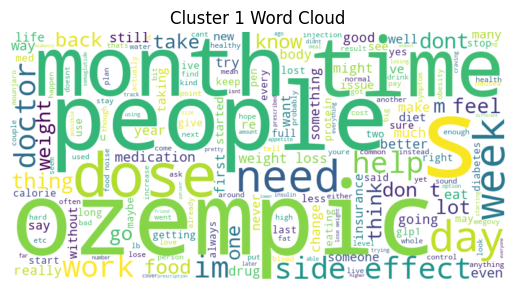

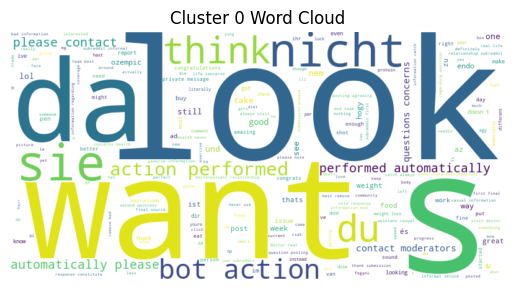

In [78]:

# Create a word cloud for each cluster
for cluster in df['cluster'].unique():
    cluster_text = ' '.join(df[df['cluster'] == cluster]['cleaned_post'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Vectorize your text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['cleaned_post'])

# Step 2: Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [81]:
def print_lda_topics(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Call this with your fitted LDA model and your CountVectorizer
print_lda_topics(lda_model, vectorizer)


Topic 1: ozempic, people, don, need, like, know, sie, du, wegovy, glp1
Topic 2: food, like, eating, information, im, want, ozempic, years, need, make
Topic 3: ozempic, people, like, time, insurance, look, day, weight, dont, lot
Topic 4: like, dose, weight, week, people, dont, eat, going, try, loss
Topic 5: weight, think, months, time, loss, good, im, lose, starting, lost


In [85]:
lda_topic_matrix = lda_model.transform(doc_term_matrix)
import numpy as np
df['dominant_topic'] = np.argmax(lda_topic_matrix, axis=1)

sentiment_by_topic = df.groupby(['dominant_topic', 'sentiment']).size().unstack(fill_value=0)
# Add total column
sentiment_by_topic['total_comments'] = sentiment_by_topic.sum(axis=1)
print(sentiment_by_topic)
print(df.head())

sentiment        0    1  total_comments
dominant_topic                         
0               56   53             109
1               56   50             106
2               55   89             144
3               57  108             165
4               57   87             144
                                             comment  \
0  If you’ve been off of any GLP-1 type peptide f...   
1  Is he the jerk it sounds like he is?  He must ...   
2  Honestly that’s heartbreaking her mom does tha...   
3  No. As dogs do not prepare their own food, it'...   
4  No.\n\nDo you need help building a diet plan f...   

                                        cleaned_post  cluster  sentiment  \
0  you’ve glp1 type peptide 3 months act like you...        1          1   
1  jerk sounds like must feel like loser failure ...        0          0   
2                  honestly that’s heartbreaking mom        0          0   
3  dogs prepare food easy put weight loss diet se...        1          1   
4  